In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load saved train, validation, test datasets
X_train = np.load("C:/Users/pasha/X_train.npy")
y_train = np.load("C:/Users/pasha/y_train.npy")
X_val = np.load("C:/Users/pasha/X_val.npy")
y_val = np.load("C:/Users/pasha/y_val.npy")
X_test = np.load("C:/Users/pasha/X_test.npy")
y_test = np.load("C:/Users/pasha/y_test.npy")

In [3]:
print("Number of train samples : ", X_train.shape[0])
print("Number of validation samples :", X_val.shape[0])
print("Number of test samples :", X_test.shape[0])

Number of train samples :  6112
Number of validation samples : 1310
Number of test samples : 1310


# Training Model
In this part, we will use a simple a CNN(Convolutional Neural Network) model. Our CNN model consists of one input layer, 2 convolutional layer, 2 dense layer and 1 output layer.<br>
Steps for creating CNN;
- Define a input layer which has a similiar shape with the images. Choose the best activation function for the problem
- Set padding same for saving details at the border of images.
- Add pooling layer for saving only useful information that way computation power can be reduced. Accuracy will increase since model trains with only useful information.
- Add dropout layer to prevent overfitting
- Add convolutional layers and padding.
- Flatten these layers into 1 dimension.
- Add hidden dense layers so that the model can learn.
- Add a output layer with a shape of number of categories to be classifed. Choose the best activation function for the problem.
- Compile the model with an optimizer to deal with the overfitting issue. Choose a loss function appropriate to the problem. (We used sparse categorical crossentropy because our classes are mutually exclusive (e.g. when each sample belongs exactly to one class)

Afterwards we visualize our performance of the model, made some prediction in order to find whether our model is trained well or not.

In [4]:
model = tf.keras.Sequential()

In [5]:
# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(32,32,1)))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Dropout(0.3))

In [6]:
# Add more convolution and max pooling layers
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Dropout(0.3))

In [7]:
# Flatten the convolution layer
model.add(tf.keras.layers.Flatten())

In [8]:
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [9]:
# Add the output layer
model.add(tf.keras.layers.Dense(10, activation="softmax")) #For multiclass classification problems softmax activation function were used in output layer

In [10]:
# Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]) #For multiclass classification problems sparse_categorical_crossentropy were used for calculating loss

In [11]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [12]:
# Train the model for 50 epochs with batch size of 128
results = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=50,
                    callbacks=[callback],
                    validation_data=(X_val, y_val))

Epoch 1/50
96/96 [==============================] - 5s 47ms/step - loss: 2.0040 - accuracy: 0.2387 - val_loss: 1.7051 - val_accuracy: 0.3832
Epoch 2/50
96/96 [==============================] - 4s 45ms/step - loss: 1.6114 - accuracy: 0.4072 - val_loss: 1.4271 - val_accuracy: 0.5137
Epoch 3/50
96/96 [==============================] - 4s 46ms/step - loss: 1.3728 - accuracy: 0.5077 - val_loss: 1.2016 - val_accuracy: 0.5786
Epoch 4/50
96/96 [==============================] - 4s 46ms/step - loss: 1.2294 - accuracy: 0.5623 - val_loss: 1.0514 - val_accuracy: 0.6321
Epoch 5/50
96/96 [==============================] - 4s 46ms/step - loss: 1.1360 - accuracy: 0.6023 - val_loss: 0.9875 - val_accuracy: 0.6695
Epoch 6/50
96/96 [==============================] - 4s 45ms/step - loss: 1.0439 - accuracy: 0.6381 - val_loss: 0.8828 - val_accuracy: 0.6947
Epoch 7/50
96/96 [==============================] - 4s 46ms/step - loss: 0.9743 - accuracy: 0.6672 - val_loss: 0.8870 - val_accuracy: 0.6939
Epoch 8/50
96

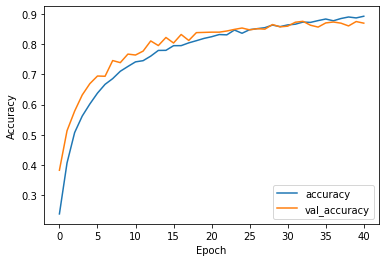

In [13]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"], label="accuracy")

# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"], label="val_accuracy")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
# Put legend table
plt.legend()

# Show the plot
plt.show()

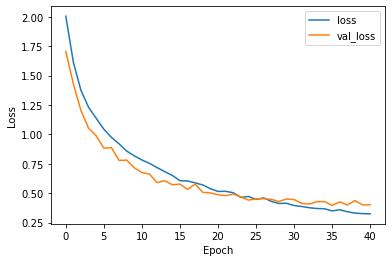

In [14]:
# Plot the the training loss
plt.plot(results.history["loss"], label="loss")

# Plot the the validation loss
plt.plot(results.history["val_loss"], label="val_loss")

# Name the x and y axises
plt.xlabel("Epoch")
plt.ylabel("Loss")
# Put legend table
plt.legend()

# Show the plot
plt.show()

In [15]:
# Evaluate the performance
model.evaluate(X_test, y_test)

41/41 [==============================] - 0s 6ms/step - loss: 0.3195 - accuracy: 0.8977


[0.3194507658481598, 0.8977099061012268]

In [16]:
# Make prediction on the reshaped sample
prediction_result = model.predict(X_test[10].reshape(1,32,32))

# Print the prediction result
prediction_result

1/1 [==============================] - 0s 113ms/step


array([[3.0062281e-05, 2.3208594e-08, 8.1082351e-07, 3.6254872e-07,
        1.9133557e-08, 9.9995589e-01, 1.2178398e-11, 5.9397996e-07,
        2.5175279e-06, 9.7898564e-06]], dtype=float32)

In [17]:
# Find the predicted class
predicted_class = prediction_result.argmax()
# Find the prediction probability
predicted_probabilty = prediction_result.max()

In [18]:
# Print the results
print(f"This image belongs to class {predicted_class} with {predicted_probabilty} %")

This image belongs to class 5 with 0.9999558925628662 %
